# 1. Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import plot_confusion_matrix
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score,confusion_matrix
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,r2_score
%matplotlib inline

# . Import the Dataset

In [3]:
data=pd.read_csv("data_response.csv")

In [4]:
data.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10770,10771,Female,42,1,11.0,0,1-2 Year,Yes,48521.0,122.0,206,1
1,19506,19507,Male,48,1,34.0,0,1-2 Year,Yes,2630.0,156.0,223,1
2,6228,6229,Male,76,1,28.0,1,1-2 Year,No,29620.0,26.0,69,0
3,18790,18791,Male,48,1,15.0,0,1-2 Year,Yes,29781.0,26.0,140,1
4,25390,25391,Male,41,1,46.0,0,1-2 Year,Yes,23826.0,124.0,261,1


## 3. Check the basic statistics of the whole dataset and give the
interpretations

In [5]:
data.shape

(10000, 13)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10000 non-null  int64  
 1   id                    10000 non-null  int64  
 2   Gender                10000 non-null  object 
 3   Age                   10000 non-null  int64  
 4   Driving_License       10000 non-null  int64  
 5   Region_Code           10000 non-null  float64
 6   Previously_Insured    10000 non-null  int64  
 7   Vehicle_Age           10000 non-null  object 
 8   Vehicle_Damage        10000 non-null  object 
 9   Annual_Premium        10000 non-null  float64
 10  Policy_Sales_Channel  10000 non-null  float64
 11  Vintage               10000 non-null  int64  
 12  Response              10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1015.8+ KB


In [7]:


data.describe()

,Unnamed: 0,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,7351.088300,7352.088300,40.018900,0.998000,26.447800,0.330000,31125.978400,106.871600,154.910000,0.350000
std,7130.381057,7130.381057,14.850555,0.044679,12.719947,0.470236,16975.427752,55.389534,83.716177,0.476993
min,0.000000,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,2499.750000,2500.750000,26.000000,1.000000,15.000000,0.000000,24867.250000,26.000000,83.000000,0.000000
50%,4999.500000,5000.500000,39.000000,1.000000,28.000000,0.000000,32234.000000,124.000000,155.000000,0.000000
75%,8036.250000,8037.250000,50.000000,1.000000,34.000000,1.000000,40251.500000,152.000000,227.000000,1.000000
max,28123.000000,28124.000000,84.000000,1.000000,52.000000,1.000000,267698.000000,163.000000,299.000000,1.000000


# Show the dependent variable (Response) distribution and
write the observations of it

In [8]:
def numeric_analysis_hist(feature1):
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(feature1+' Distribution',fontsize = 20) 
    plt.xlabel(feature1 , fontsize = 15)  
    
    dist = sns.distplot(data[feature1],color='g')

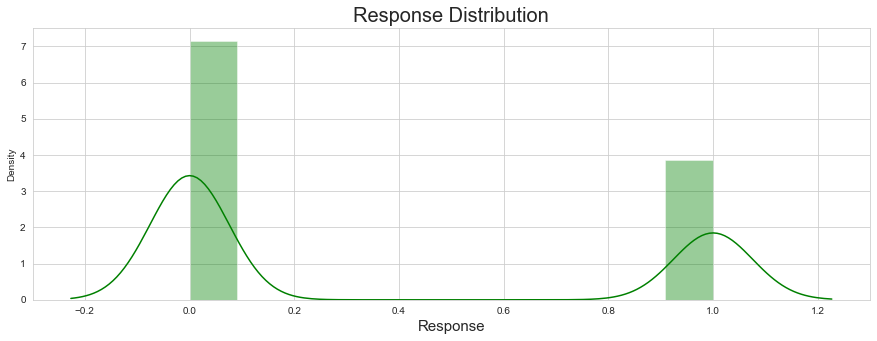

In [9]:
numeric_analysis_hist("Response")

** As this is classifiaction problem so we are the curve like that we can say that  the number 0's is  approximately 70% and 1's is 30%.

# show that how the independent variables are distributed with dependent variable


In [10]:
def numeric_analysis_scatter(feature1, feature2):
    sns.set_style('whitegrid')    
    plt.figure(figsize=(15,5))
    plt.title(feature1+' X '+feature2,fontsize = 20) 
    plt.xlabel(feature1 , fontsize = 15)  
    
    scatter = sns.scatterplot(data[feature1],data[feature2],markers='o',color='m')  

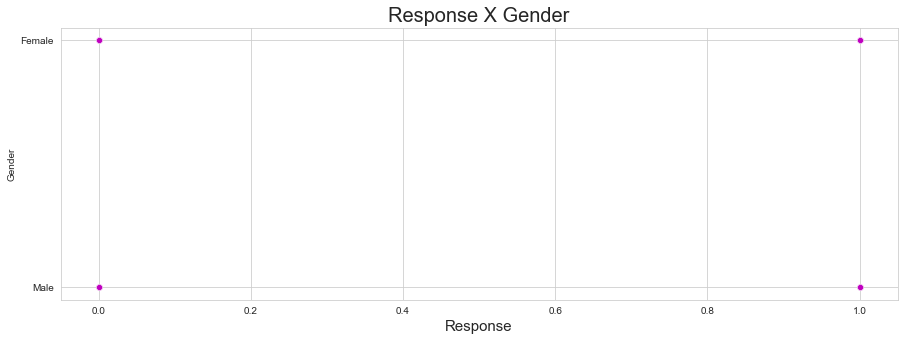

In [11]:
numeric_analysis_scatter("Response","Gender")

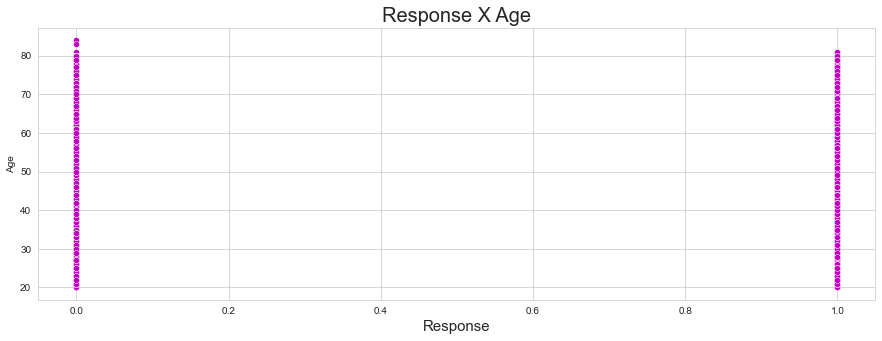

In [12]:
numeric_analysis_scatter("Response","Age")

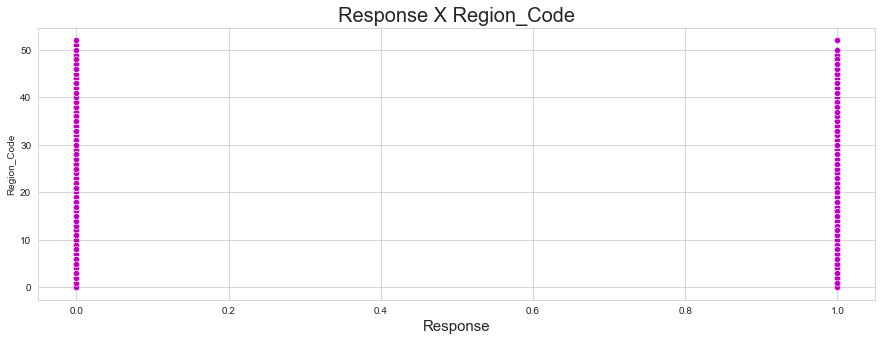

In [13]:
numeric_analysis_scatter("Response","Region_Code")

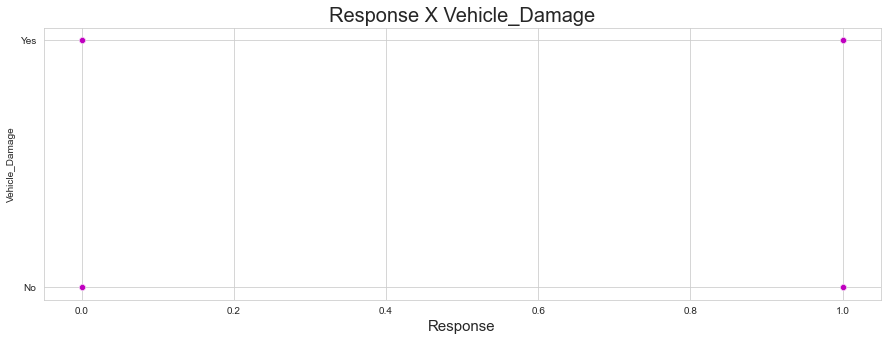

In [14]:
numeric_analysis_scatter("Response","Vehicle_Damage")

# . Do the required Data Preprocessing

In [15]:
data.head()

,Unnamed: 0,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10770,10771,Female,42,1,11.0,0,1-2 Year,Yes,48521.0,122.0,206,1
1,19506,19507,Male,48,1,34.0,0,1-2 Year,Yes,2630.0,156.0,223,1
2,6228,6229,Male,76,1,28.0,1,1-2 Year,No,29620.0,26.0,69,0
3,18790,18791,Male,48,1,15.0,0,1-2 Year,Yes,29781.0,26.0,140,1
4,25390,25391,Male,41,1,46.0,0,1-2 Year,Yes,23826.0,124.0,261,1


In [16]:
data.Region_Code.value_counts()

28.0    3305
8.0      838
46.0     485
41.0     447
15.0     317
30.0     294
29.0     286
3.0      255
50.0     231
11.0     227
36.0     220
35.0     185
47.0     184
33.0     165
6.0      141
37.0     138
18.0     133
39.0     132
45.0     117
14.0     105
48.0     101
10.0      99
21.0      97
13.0      95
2.0       91
12.0      81
7.0       80
24.0      74
26.0      70
27.0      69
32.0      67
9.0       64
38.0      60
43.0      59
17.0      59
25.0      55
49.0      52
23.0      50
31.0      50
20.0      49
16.0      45
4.0       44
0.0       43
5.0       39
34.0      39
19.0      37
40.0      29
1.0       29
22.0      25
44.0      25
42.0      12
52.0       4
51.0       2
Name: Region_Code, dtype: int64

In [17]:
data.isnull().sum()

Unnamed: 0              0
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [18]:
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [19]:
data.shape

(10000, 12)

In [20]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10771,Female,42,1,11.0,0,1-2 Year,Yes,48521.0,122.0,206,1
1,19507,Male,48,1,34.0,0,1-2 Year,Yes,2630.0,156.0,223,1
2,6229,Male,76,1,28.0,1,1-2 Year,No,29620.0,26.0,69,0
3,18791,Male,48,1,15.0,0,1-2 Year,Yes,29781.0,26.0,140,1
4,25391,Male,41,1,46.0,0,1-2 Year,Yes,23826.0,124.0,261,1


In [21]:
le=LabelEncoder()
cat_col=data.columns[np.where(data.dtypes=="object")]
for col in cat_col:
    data[col]=le.fit_transform(data[col])

In [22]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10771,0,42,1,11.0,0,0,1,48521.0,122.0,206,1
1,19507,1,48,1,34.0,0,0,1,2630.0,156.0,223,1
2,6229,1,76,1,28.0,1,0,0,29620.0,26.0,69,0
3,18791,1,48,1,15.0,0,0,1,29781.0,26.0,140,1
4,25391,1,41,1,46.0,0,0,1,23826.0,124.0,261,1


# Feature Scaling

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [24]:
data[["Annual_Premium","Policy_Sales_Channel","Age","Vintage","Region_Code"]]=sc.fit_transform(data[["Annual_Premium","Policy_Sales_Channel","Age","Vintage","Region_Code"]])

In [25]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10771,0,0.133409,1,-1.214515,0,0,1,1.024769,0.273141,0.610307,1
1,19507,1,0.537455,1,0.593759,0,0,1,-1.678744,0.887006,0.813384,1
2,6229,1,2.423000,1,0.122035,1,0,0,-0.088720,-1.460125,-1.026257,0
3,18791,1,0.537455,1,-0.900033,0,0,1,-0.079235,-1.460125,-0.178111,1
4,25391,1,0.066068,1,1.537206,0,0,1,-0.430054,0.309251,1.267321,1


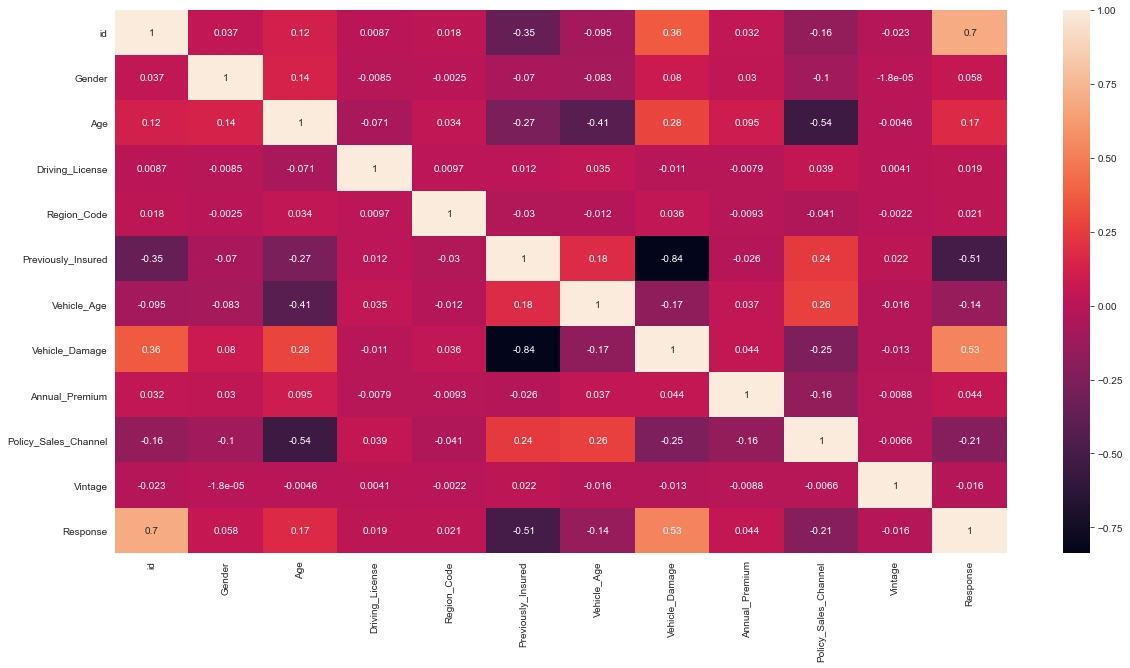

In [26]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

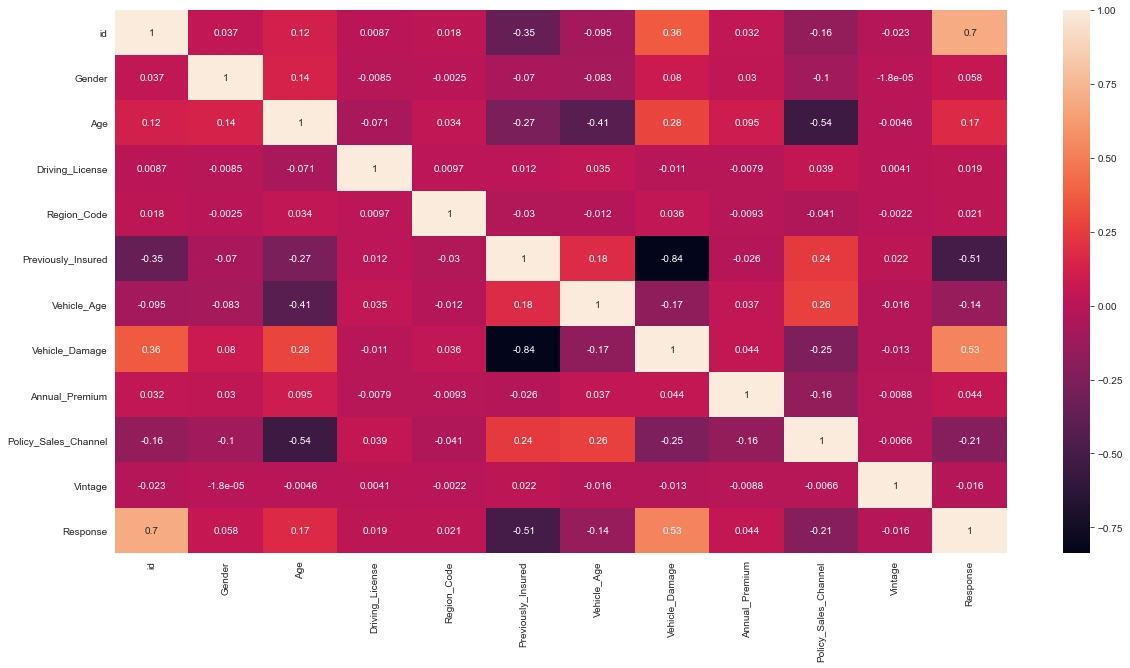

In [27]:
# Let's see the correlation matrix 
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

# Outliers

In [28]:
def numeric_analysis(feature):
    sns.set_style('whitegrid')
    out_marker = dict(markerfacecolor='yellow',markeredgecolor = 'black', marker='o', markersize = 12)
    plt.figure(figsize=(15,5))
    plt.title(feature+' outliers',fontsize = 20) 
    plt.xlabel(feature , fontsize = 15)  
    
    boxplot = sns.boxplot(data[feature],notch = True,color='skyblue',
                          showmeans=True,
                          flierprops=out_marker,
                          meanprops={ "marker":"o",
                                    "markerfacecolor":"red", 
                                    "markeredgecolor":"black",
                                    "markersize":"8"})       
    

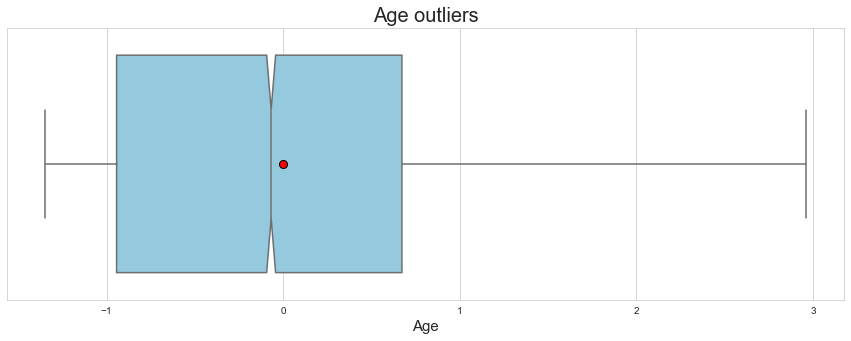

In [29]:
numeric_analysis("Age")

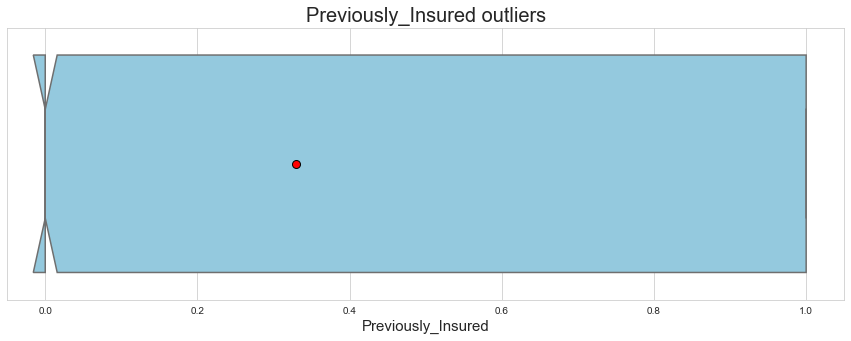

In [30]:
numeric_analysis("Previously_Insured")

In [31]:
q1=data.Response.quantile(0.25)
q3=data.Response.quantile(0.75)
q1,q3

(0.0, 1.0)

In [32]:
IQR=q3-q1
IQR

1.0

In [33]:
lower_limit=q1 - 1.5*IQR
upper_limit=q3 + 1.5*IQR
lower_limit,upper_limit

(-1.5, 2.5)

In [34]:
data[(data.Response < lower_limit) | (data.Response > upper_limit)]

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response


** There is no outliers there.**

In [35]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,10771,0,0.133409,1,-1.214515,0,0,1,1.024769,0.273141,0.610307,1
1,19507,1,0.537455,1,0.593759,0,0,1,-1.678744,0.887006,0.813384,1
2,6229,1,2.423000,1,0.122035,1,0,0,-0.088720,-1.460125,-1.026257,0
3,18791,1,0.537455,1,-0.900033,0,0,1,-0.079235,-1.460125,-0.178111,1
4,25391,1,0.066068,1,1.537206,0,0,1,-0.430054,0.309251,1.267321,1


# Devide the whole data into X and y

In [36]:
x=data.drop("Response",axis=1)
y=data.Response

In [37]:
y.value_counts()

0    6500
1    3500
Name: Response, dtype: int64

# split the data into train and test

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.7, test_size=0.3, random_state=100)

In [39]:
len(y_train)

7000

In [40]:
y_train.value_counts()

0    4562
1    2438
Name: Response, dtype: int64

In [41]:
4562/7000*100

65.17142857142856

In [42]:
2438/7000*100


34.82857142857143

###  As we can see data our data is 65% "0"  and  35% "1" so we have to balance our dataset.

In [43]:
from imblearn.combine import SMOTETomek

In [44]:
from collections import Counter

In [45]:
from imblearn.combine import SMOTETomek
from collections import Counter
st=SMOTETomek(0.8)
x_train_b,y_train_b=st.fit_resample(x_train,y_train)
print("The no. of classes before fit {}".format(Counter(y_train)))
print("The no. of classes after fit {}".format(Counter(y_train_b)))

The no. of classes before fit Counter({0: 4562, 1: 2438})
The no. of classes after fit Counter({0: 4251, 1: 3338})


# Apply the Logistic Regression

In [46]:
logistic=LogisticRegression()

In [47]:
logistic.fit(x_train,y_train)

LogisticRegression()

In [48]:
y_pred=logistic.predict(x_test)

In [49]:
y_pred_proba=logistic.predict_proba(x_test)

In [50]:
y_pred_proba

array([[4.95657984e-01, 5.04342016e-01],
       [3.70954637e-03, 9.96290454e-01],
       [7.21404665e-01, 2.78595335e-01],
       ...,
       [1.41712793e-02, 9.85828721e-01],
       [3.37869064e-04, 9.99662131e-01],
       [2.06155448e-02, 9.79384455e-01]])

In [51]:
from sklearn.feature_selection import RFE
rfe=RFE(logistic,6)
rfe=rfe.fit(x_train,y_train)

In [52]:
rfe.support_

array([False,  True, False,  True, False,  True,  True,  True, False,
        True, False])

In [53]:
list(zip(x_train, rfe.support_,rfe.ranking_))

[('id', False, 6),
 ('Gender', True, 1),
 ('Age', False, 2),
 ('Driving_License', True, 1),
 ('Region_Code', False, 4),
 ('Previously_Insured', True, 1),
 ('Vehicle_Age', True, 1),
 ('Vehicle_Damage', True, 1),
 ('Annual_Premium', False, 5),
 ('Policy_Sales_Channel', True, 1),
 ('Vintage', False, 3)]

In [54]:
accuracy_score(y_pred,y_test)

0.8906666666666667

In [55]:
x_train.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

### I am getting around 90% accuracy in logistic regression

In [56]:
x_train_s=x_train.copy()
col = x_train_s.columns

# Stats model

In [57]:
x_train_sm = sm.add_constant(x_train)
logm2 = sm.GLM(y_train, x_train_sm , family=sm.families.Binomial())

In [58]:
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1770.2
Date:                Thu, 29 Jul 2021   Deviance:                       3540.5
Time:                        15:23:40   Pearson chi2:                 4.22e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.3901      2.184     -3.842      0.000     -12.670      -4.110
id                       0.0004    1.3e-05     29.437      0.000       0.000       0.000
Gender                   0.1470      0.086      1.715      0.086      -0.021       0.315
Age                     -0.0909      0.051     -1.786      0.074      -0.191       0.009
Driving_License          3.6294      2.166      1.676      0.094      -0.616       7.875
Region_Code             -0.0281      0.044     -0.646      0.518      -0.113       0.057
Previously_Insured      -3.2846      0.399     -8.232      0.000      -4.067      -2.503
Vehicle_Age             -0.1690      0.069     -2.456      0.014      -0.304      -0.034
Vehicle_Damage           2.2809      0.230      9.933      0.000       1.831       2.731
Annual_Premium           0.0107      0.041      0.259      0.796      -0.071       0.092
Policy_Sales_Channel    -0.2446      0.048     -5.132      0.000      -0.338      -0.151
Vintage                 -0.0007      0.042     -0.016      0.987      -0.084       0.082
========================================================================================
"""

In [59]:
# Getting the predicted values from train set
y_train_predict = res.predict(x_train_sm)


In [59]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_s.columns
vif['VIF'] = [variance_inflation_factor(x_train_s.values,i) for i in range(x_train_s.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Driving_License,16.08
7,Vehicle_Damage,9.43
5,Previously_Insured,5.05
0,id,2.41
1,Gender,2.30
6,Vehicle_Age,1.99
2,Age,1.65
9,Policy_Sales_Channel,1.49
8,Annual_Premium,1.04
4,Region_Code,1.00


In [61]:
col = col.drop(['Driving_License'], 1)

In [62]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = x_train_s[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_s[col].values,i) for i in range(x_train_s[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,Vehicle_Damage,3.17
0,id,2.30
1,Gender,2.15
5,Vehicle_Age,1.89
4,Previously_Insured,1.69
2,Age,1.65
8,Policy_Sales_Channel,1.49
7,Annual_Premium,1.03
3,Region_Code,1.00
9,Vintage,1.00


In [63]:
X_train_sm = sm.add_constant(x_train_s[col])
logm3 = sm.GLM(y_train, x_train_sm , family=sm.families.Binomial())

In [64]:
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6988
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1770.2
Date:                Tue, 27 Jul 2021   Deviance:                       3540.5
Time:                        15:18:04   Pearson chi2:                 4.22e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -8.3901      2.184     -3.842      0.000     -12.670      -4.110
id                       0.0004    1.3e-05     29.437      0.000       0.000       0.000
Gender                   0.1470      0.086      1.715      0.086      -0.021       0.315
Age                     -0.0909      0.051     -1.786      0.074      -0.191       0.009
Driving_License          3.6294      2.166      1.676      0.094      -0.616       7.875
Region_Code             -0.0281      0.044     -0.646      0.518      -0.113       0.057
Previously_Insured      -3.2846      0.399     -8.232      0.000      -4.067      -2.503
Vehicle_Age             -0.1690      0.069     -2.456      0.014      -0.304      -0.034
Vehicle_Damage           2.2809      0.230      9.933      0.000       1.831       2.731
Annual_Premium           0.0107      0.041      0.259      0.796      -0.071       0.092
Policy_Sales_Channel    -0.2446      0.048     -5.132      0.000      -0.338      -0.151
Vintage                 -0.0007      0.042     -0.016      0.987      -0.084       0.082
========================================================================================
"""

In [65]:
col = col.drop('Age', 1)

In [66]:
x_train_sm = sm.add_constant(x_train_s[col])
logm4 = sm.GLM(y_train, x_train_sm , family=sm.families.Binomial())

In [67]:
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Response   No. Observations:                 7000
Model:                            GLM   Df Residuals:                     6990
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1775.1
Date:                Tue, 27 Jul 2021   Deviance:                       3550.1
Time:                        15:18:05   Pearson chi2:                 4.21e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -4.7567      0.247    -19.285      0.000      -5.240      -4.273
id                       0.0004    1.3e-05     29.443      0.000       0.000       0.000
Gender                   0.1344      0.085      1.577      0.115      -0.033       0.302
Region_Code             -0.0289      0.044     -0.663      0.507      -0.114       0.057
Previously_Insured      -3.2819      0.399     -8.226      0.000      -4.064      -2.500
Vehicle_Age             -0.1397      0.067     -2.089      0.037      -0.271      -0.009
Vehicle_Damage           2.2576      0.229      9.862      0.000       1.809       2.706
Annual_Premium           0.0069      0.041      0.167      0.867      -0.074       0.088
Policy_Sales_Channel    -0.2078      0.043     -4.874      0.000      -0.291      -0.124
Vintage                 -0.0015      0.042     -0.035      0.972      -0.085       0.082
========================================================================================
"""

In [68]:
vif = pd.DataFrame()
vif['Features'] = x_train_s[col].columns
vif['VIF'] = [variance_inflation_factor(x_train_s[col].values, i) for i in range(x_train_s[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Vehicle_Damage,3.10
0,id,2.29
1,Gender,2.13
4,Vehicle_Age,1.71
3,Previously_Insured,1.69
7,Policy_Sales_Channel,1.18
6,Annual_Premium,1.03
2,Region_Code,1.00
8,Vintage,1.00


In [69]:

y_train_predict_st = res.predict(x_train_sm).values.reshape(-1)


In [70]:
col

Index(['id', 'Gender', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [71]:
x_test_s=x_test.copy()

In [72]:
x_test_sm = sm.add_constant(x_test_s[col])
logm5 = sm.GLM(y_test, x_test_sm , family=sm.families.Binomial())

In [73]:
y_test_pred_s=res.predict(x_test_sm).values.reshape(-1)


In [74]:
y_test_pred_s.shape

(3000,)

In [75]:
y_test.shape

(3000,)

In [76]:
r2_score(y_test,y_test_pred_s)

0.635739616030923

#### By using OLS model we are getting less accuracy than logistic regreesion and i.e 64% only

In [77]:
x_real=data[col]

In [78]:
y_real=data.Response

In [79]:
x_train, x_test, y_train, y_test = train_test_split(x_real,y_real, train_size=0.7, test_size=0.3, random_state=100)

In [80]:
x_real.head()

,id,Gender,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,10771,0,-1.214515,0,0,1,1.024769,0.273141,0.610307
1,19507,1,0.593759,0,0,1,-1.678744,0.887006,0.813384
2,6229,1,0.122035,1,0,0,-0.088720,-1.460125,-1.026257
3,18791,1,-0.900033,0,0,1,-0.079235,-1.460125,-0.178111
4,25391,1,1.537206,0,0,1,-0.430054,0.309251,1.267321


In [81]:
y_real.shape

(10000,)

In [82]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 9)
(3000, 9)
(7000,)
(3000,)


## Find best threshold value using Log-Loss

In [56]:
# calculate roc curves
from numpy import sqrt
from numpy import argmax
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# get the best threshold
J = tpr - fpr
ix = argmax(J)
best_thresh = thresholds[ix]
print('Best Threshold=%f' % (best_thresh))

Best Threshold=1.000000


In [57]:
from sklearn.metrics import log_loss
class threshold():
    def __init__(self):
        self.th = 0.5
        
    def predict_threshold(self,y):
        if y >= self.th:
            return 1
        else:
            return 0


In [58]:
# traning data
y_pred_train = logistic.predict_proba(x_train)
y_pred_train_1 = y_pred_train[:,1]


In [59]:
y_pred_train_prob_1 =y_pred_train_1
probailites = np.linspace(0,1,num = 100) # generating 100 values in 0 -1 
pre = threshold() # initializing class
mle = [] 
for p in probailites:
    pre.th = p
    yy = pd.Series(y_pred_train_prob_1)
    y_pred_0_5 =yy.apply(pre.predict_threshold)
    loss = log_loss(y_train,y_pred_0_5)
    mle.append(loss)


Threshold Probability Value = 0.595959595959596


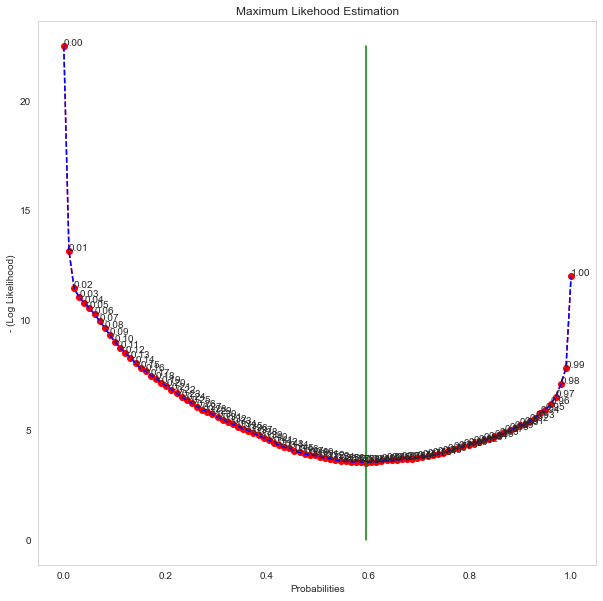

In [60]:
plt.figure(figsize=(10,10))
plt.plot(probailites,mle,'ro--')
plt.plot(probailites,mle,'b--')
ind = np.array(mle).argmin()
mx = max(mle)
val = probailites[ind]

print('Threshold Probability Value =',val)

plt.plot([val,val],[0,mx],'g')


for i,p in enumerate(probailites):
    plt.text(probailites[i],mle[i],'%0.2f'%(p))


plt.xlabel('Probabilities')
plt.ylabel('- (Log Likelihood)')
plt.title('Maximum Likehood Estimation')
plt.grid()
plt.show()


# 11. Find The Classification Metrics and Give the Observations to
###  Metric for Logistic regression algorithms
###  Discuss the every metric and why these metrics are usefull for model.
###   Confusion Matrix
###   Precision
###   Recall
###   Specificity
###   Sensitivity
###   Accuracy
###   F1-score
###   True Positive Rate
###   False Positive Rate
###   Classification Report
###   ROC_AUC Curve

In [61]:
confusion=confusion_matrix(y_pred,y_test)

In [62]:
confusion

array([[1848,  238],
       [  90,  824]], dtype=int64)

## Metrics beyond simply accuracy

In [63]:
TN=confusion[0,0] # True negetive
FP=confusion[0,1] # False positive
FN=confusion[1,0] # False negetive 
TP=confusion[1,1] # True Postive

### Sensetivity of the model-True positive rate


In [64]:
TP/float(TP+FN)

0.9015317286652079

## Let us calculate specificity


In [65]:
TP/float(TP+FP)

0.775894538606403

# Calculate false postive rate 

In [66]:
FP/float(TN+FP)

0.11409395973154363

# positive predictive value 


In [67]:
TP/float(TP+FP)

0.775894538606403

# Negative predictive value


In [68]:
TN/float(TN+FN)

0.9535603715170279

# Precision score and recall score

In [69]:
from sklearn.metrics import precision_score,recall_score 

In [70]:
precision_score(y_pred,y_test)

0.775894538606403

In [71]:
recall_score(y_pred,y_test)

0.9015317286652079

In [72]:
from sklearn.metrics import classification_report

In [73]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.89      0.95      0.92      1938\n           1       0.90      0.78      0.83      1062\n\n    accuracy                           0.89      3000\n   macro avg       0.89      0.86      0.88      3000\nweighted avg       0.89      0.89      0.89      3000\n'

In [74]:
import innomatics

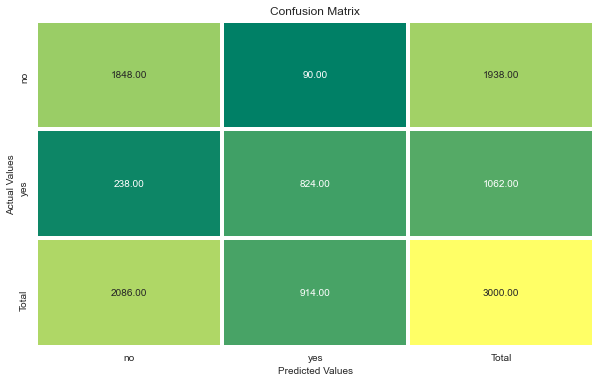

******************************Classifcation Report******************************


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1938
           1       0.90      0.78      0.83      1062

    accuracy                           0.89      3000
   macro avg       0.89      0.86      0.88      3000
weighted avg       0.89      0.89      0.89      3000


************************************Kappa Score************************************


Kappa Score = 0.7531770924261487

******************************Area Under Curve Score******************************


AUC Score = 0.8647274550617154
Number of probabilities to build ROC = 452


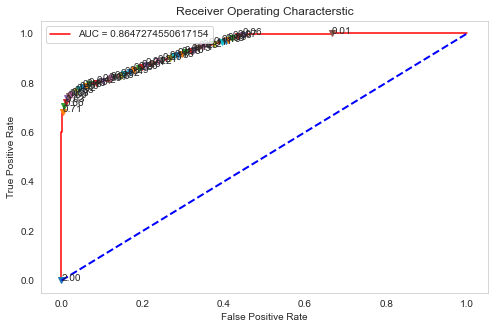

In [75]:
innomatics.classification_metric(y_test,y_pred,y_pred_proba[:,1],
                                 label=['no','yes'],n=10,verbose=True)

# Decision tree

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [108]:
cls_gini=DecisionTreeClassifier(criterion='gini')

In [109]:
cls_gini.fit(x_train,y_train)

DecisionTreeClassifier()

In [79]:
cls_gini.score(x_test,y_test)

0.8703333333333333

In [80]:
cls_en=DecisionTreeClassifier(criterion="entropy")

In [81]:
cls_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [82]:
cls_en.score(x_test,y_test)

0.86

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
dt = DecisionTreeClassifier(random_state=42)

In [85]:
# create the parameter for grid
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100],
    'criterion': ["gini", "entropy"]
    
    
}

In [86]:
grid_search=GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1, verbose=1, scoring='accuracy')

In [87]:
grid_search.fit(x_train_b,y_train_b)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [88]:
score_df=pd.DataFrame(grid_search.cv_results_)

In [89]:
score_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025183,0.003963,0.003496,0.002060,gini,2,5,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
1,0.019226,0.003458,0.002994,0.001728,gini,2,10,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
2,0.012216,0.001295,0.005236,0.001635,gini,2,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
3,0.013276,0.001380,0.002432,0.001860,gini,2,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
4,0.006276,0.005830,0.003906,0.006766,gini,2,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
5,0.019528,0.006764,0.003905,0.006763,gini,3,5,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
6,0.022839,0.012503,0.003906,0.006765,gini,3,10,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
7,0.016917,0.002241,0.009355,0.007534,gini,3,20,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
8,0.022130,0.006739,0.001769,0.001797,gini,3,50,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4
9,0.010852,0.004825,0.003906,0.006766,gini,3,100,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.920443,0.914075,0.920401,0.908276,0.915799,0.005057,4


In [90]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=50,
                       random_state=42)

In [106]:
DT=DecisionTreeClassifier(criterion="gini",max_depth=10, min_samples_leaf=20, random_state=42)

In [92]:
st=SMOTETomek(0.6)
x_train_b,y_train_b=st.fit_resample(x_train,y_train)
print("The no. of classes before fit {}".format(Counter(y_train)))
print("The no. of classes after fit {}".format(Counter(y_train_b)))

The no. of classes before fit Counter({0: 4562, 1: 2438})
The no. of classes after fit Counter({0: 4259, 1: 2434})


In [93]:
DT.fit(x_train_b,y_train_b)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=20, random_state=42)

In [94]:
DT.score(x_test,y_test)

0.8993333333333333

### Using decison tree algorithm i am geting above 90% accuracy

# Visualize the tree

In [95]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz

In [97]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [111]:
dot_data = export_graphviz(cls_gini,feature_names=
                          x_train.columns)

In [112]:
print(dot_data)

digraph Tree {
node [shape=box] ;
0 [label="id <= 7405.0\ngini = 0.454\nsamples = 7000\nvalue = [4562, 2438]"] ;
1 [label="Vehicle_Damage <= 0.5\ngini = 0.214\nsamples = 5195\nvalue = [4562, 633]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Policy_Sales_Channel <= 0.986\ngini = 0.009\nsamples = 2537\nvalue = [2526, 11]"] ;
1 -> 2 ;
3 [label="Previously_Insured <= 0.5\ngini = 0.008\nsamples = 2534\nvalue = [2524, 10]"] ;
2 -> 3 ;
4 [label="Vintage <= -1.713\ngini = 0.054\nsamples = 358\nvalue = [348, 10]"] ;
3 -> 4 ;
5 [label="Vintage <= -1.725\ngini = 0.5\nsamples = 2\nvalue = [1, 1]"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [1, 0]"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1]"] ;
5 -> 7 ;
8 [label="Annual_Premium <= -0.386\ngini = 0.049\nsamples = 356\nvalue = [347, 9]"] ;
4 -> 8 ;
9 [label="Annual_Premium <= -0.392\ngini = 0.102\nsamples = 111\nvalue = [105, 6]"] ;
8 -> 9 ;
10 [label="Age <= 1.177\ngini = 0.087\nsamples = 

In [105]:
graph = pydotplus.graph_from_dot_data(dot_data)
img = Image(graph.create_png())
img

InvocationException: Program terminated with status: 1. stderr follows: Format: "png" not recognized. Use one of:


In [114]:
!dot -Tpng tree.dot -o graph.png 

Format: "png" not recognized. Use one of:


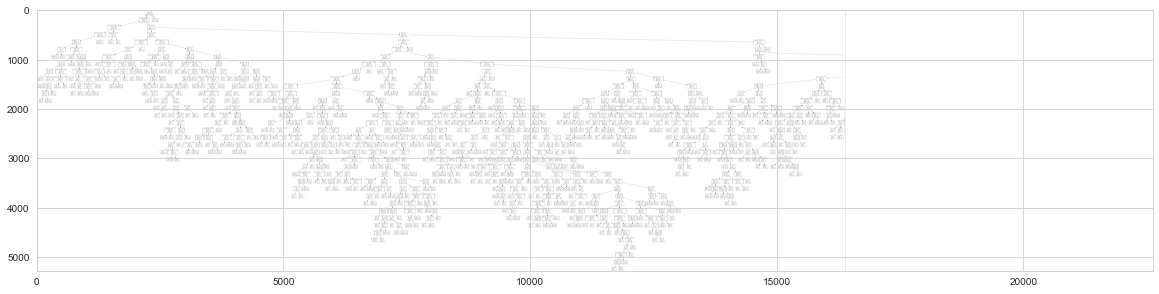

In [116]:

image = plt.imread('graph.png') 
plt.figure(figsize=(20,20)) 
plt.imshow(image)


## In my point of view Decision tree algorithm is best suite for this dataset. 